# Feature Analysis

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

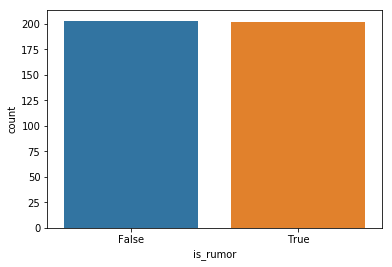

In [8]:
gw_threads = pd.read_csv("data/threads/germanwings-crash.csv")
y = gw_threads.is_rumor
x = gw_threads.drop(['is_rumor', 'event', "src_age", "Unnamed: 0", "first_resp", "thread","last_resp", "time_to_first_resp", "time_to_last_resp", "created", "src.created_at"], axis = 1)
ax = sns.countplot(y, label="Count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

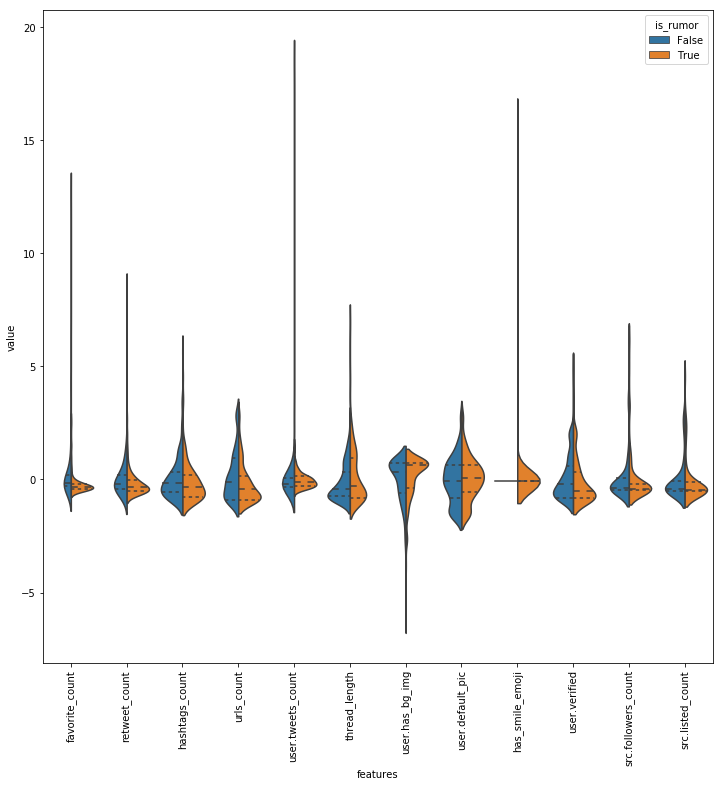

In [9]:
data = x
Z = (data - data.mean()) / data.std()  # normalaize
X = pd.concat([y, Z.iloc[:,0:12]], axis=1)
X = pd.melt(X, id_vars="is_rumor", var_name="features", value_name="value")
plt.figure(figsize=(12,12))
sns.violinplot(x="features", y="value", hue="is_rumor", data=X, split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

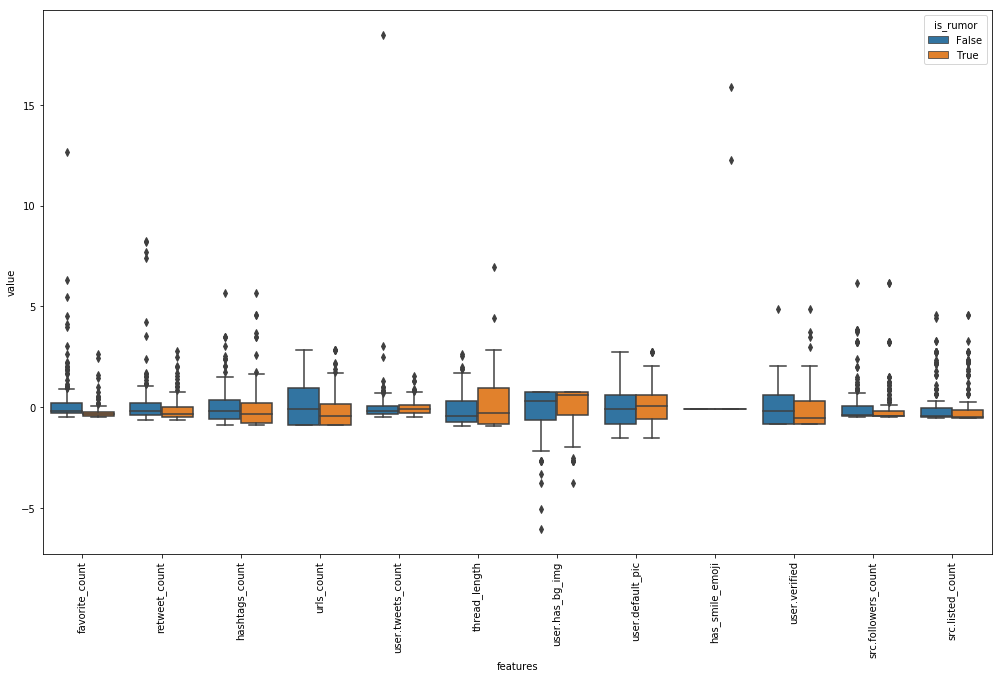

In [10]:
plt.figure(figsize=(17,10))
sns.boxplot(x="features", y="value", hue="is_rumor", data=X)
plt.xticks(rotation=90)

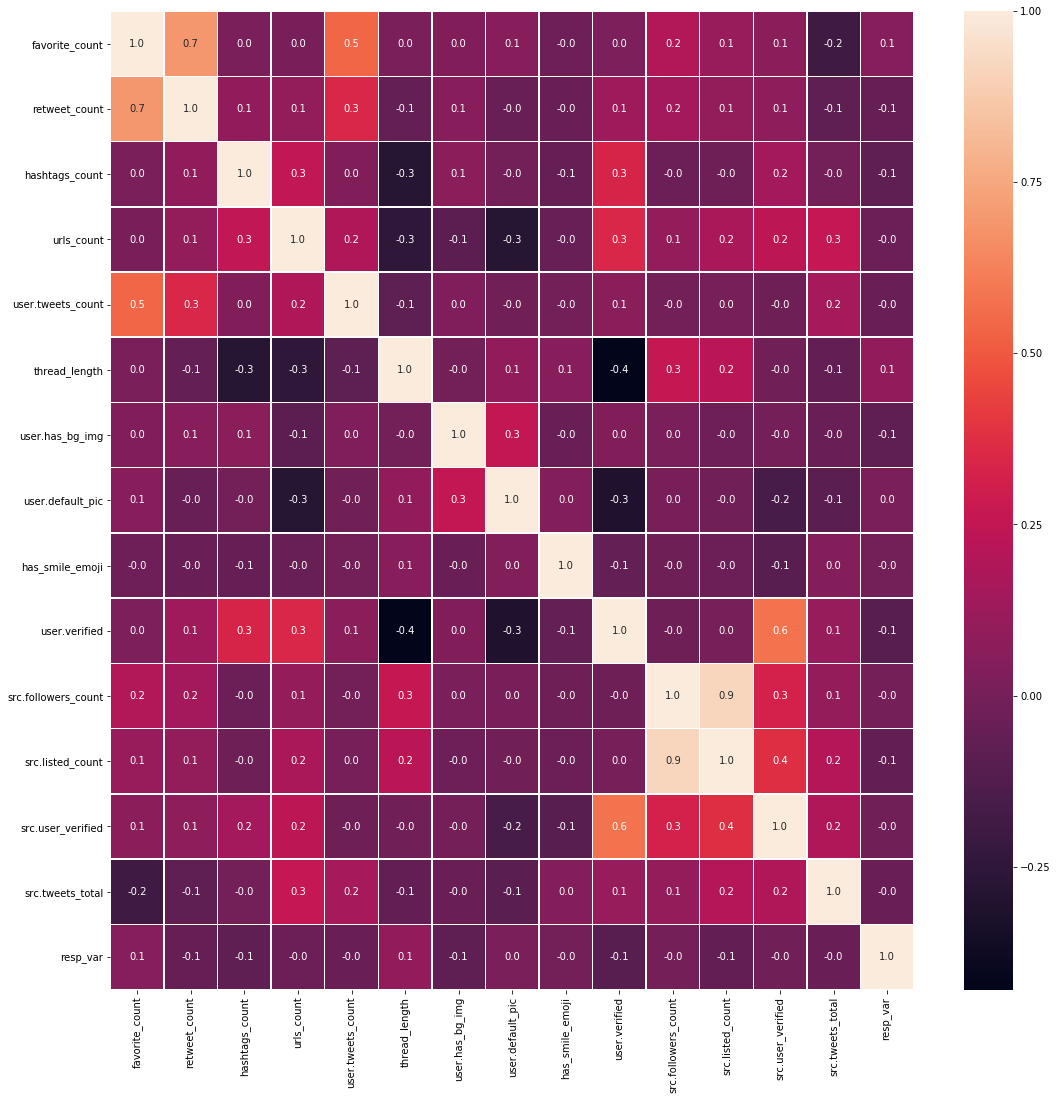

In [11]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)